## Import libraries

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', None)

## Reading files

In [45]:
categorical = pd.read_csv('files_for_lab/categorical.csv')
numerical = pd.read_csv('files_for_lab/numerical.csv')
targets = pd.read_csv('files_for_lab/target.csv')

In [46]:
all_data = pd.concat([categorical,numerical,targets],axis=1)
all_data.shape

(95412, 339)

In [47]:
all_data.isna().sum().sum()

0

In [48]:
cat_cols = categorical.columns

### Feature selection

#### 1. Categoricals

In [147]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,96,1,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,96,1,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,95,1,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,86,1,40,5,90,11,96,8,97,1,86,12


#### Columns I will drop and why:
* CLUSTER --> it has too many unique values and the information given in it will also be given in other columns like income or
* DATASRCE --> I don't think the way the data is collected affects whether the person would donate
* RFA_2R --> it is a constant column, it only has one value, it does not give any information
* RFA_2A --> amount of last gift encoded ¿? check
* GEOCODE2 ¿?
* DOMAIN_A ¿?
* ODATEW_MM --> We are trying to predict if a person will donate, it doesn't matter in which month it was his/her first donation
* DOB_YR & DOB_MM --> we already have the age, we don't need this information
* MIN & MAX RDATES --> it won't help to predict if the person will or won't donate the date of their max and min donation
* LASTDATE_MM & FIRSTDATE_MM --> I don't think the month of first and last donation will help us here, but I will keep the year

In [234]:
cat1 = categorical.drop(['CLUSTER','DATASRCE','RFA_2R','RFA_2A','GEOCODE2','DOMAIN_A','ODATEW_MM','DOB_YR','DOB_MM','MINRDATE_YR','MINRDATE_MM','MAXRDATE_YR','MAXRDATE_MM','LASTDATE_MM','FIRSTDATE_MM'],axis=1)
cat2 = categorical.drop(['CLUSTER','DATASRCE','RFA_2R','RFA_2A','ODATEW_MM','DOB_YR','DOB_MM','MINRDATE_YR','MINRDATE_MM','MAXRDATE_YR','MAXRDATE_MM','LASTDATE_MM','FIRSTDATE_MM'],axis=1)

#### 2. Numericals

In [148]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

#### fit and transform to check K Best and PCA

In [149]:
    #fit and transform scaling numericals
    mm = MinMaxScaler().fit(numerical) 
    numericals_transf = mm.transform(numerical)
    numericals_transf = pd.DataFrame(numericals_transf,columns=numerical.columns) 

In [152]:
    #fit and transform scaling numericals
    standard = StandardScaler().fit(numerical) 
    num_transf = standard.transform(numerical)
    num_transf = pd.DataFrame(num_transf,columns=numerical.columns) 

In [154]:
y = targets[['TARGET_B']]

#### Checking PCA

In [164]:
pca = PCA(0.9)
pca.fit(numericals_transf)

PCA(n_components=0.9)

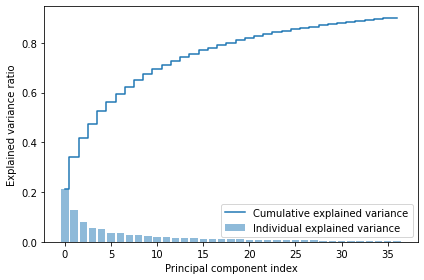

In [165]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [166]:
pca.explained_variance_ratio_

array([0.21145524, 0.12880942, 0.07827557, 0.05602873, 0.04990107,
       0.03573251, 0.03474263, 0.02905702, 0.02804488, 0.02167559,
       0.0205015 , 0.0180441 , 0.01631858, 0.01502684, 0.01342913,
       0.01309679, 0.01105654, 0.01001569, 0.00975294, 0.0095908 ,
       0.00889804, 0.00808802, 0.00736519, 0.0067056 , 0.00644246,
       0.00592145, 0.00585141, 0.005272  , 0.00487103, 0.0045723 ,
       0.00438125, 0.0041346 , 0.00402177, 0.00393728, 0.00365498,
       0.00351845, 0.00327374])

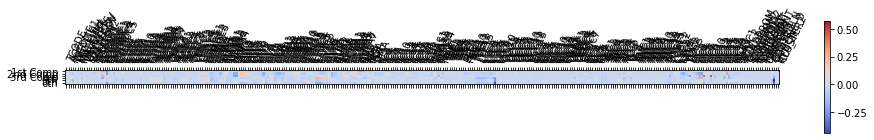

In [169]:
plt.matshow(pca.components_[0:6], cmap='coolwarm')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th','5th','6th'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(numericals_transf.columns)),numericals_transf.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [ ]:
# I don't know how to check the columns with higher ration in the principal components so I will use KBest

#### Checking KBest and multicolinearity

In [197]:
k_model_mm = SelectKBest(chi2, k=10).fit(numericals_transf, y)

df_mm = pd.DataFrame(data = k_model_mm.scores_, columns = ['score_mm'])

df_mm['Column'] = numericals_transf.columns

print(df_mm.sort_values(by = ['score_mm'], ascending = False).head(20))

       score_mm    Column
313  210.290810    RFA_2F
305   27.516508  CARDGIFT
110   26.474583      HVP1
111   25.757492      HVP2
112   21.545080      HVP3
115   19.261394      HVP6
113   14.874056      HVP4
22    13.034181      ETH2
129   12.581538       RP1
130   11.022637       RP2
304    8.909015  NGIFTALL
83     8.309269       HV1
84     8.260178       HV2
108    7.470098     ETHC5
107    7.224822     ETHC4
299    7.083556  CARDPROM
300    6.744744   NUMPROM
131    5.622626       RP3
114    5.545304      HVP5
314    4.838850  CLUSTER2


In [226]:
nums = list(df_mm[df_mm.sort_values(by = ['score_mm'], ascending = False)['score_mm']>10]['Column'])

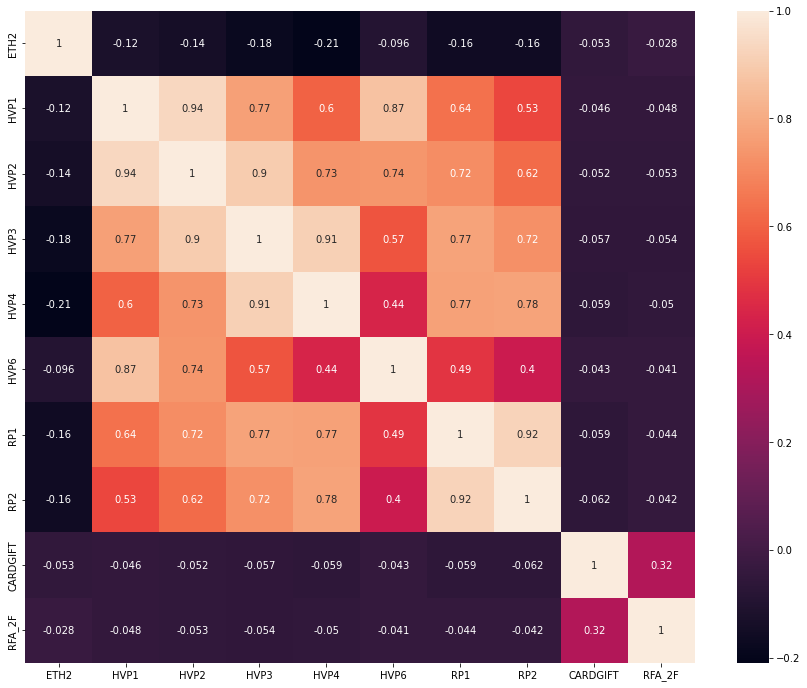

In [227]:
corr_matrix=numericals_transf[nums].corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [228]:
to_drop = ['RP1','HVP2','HVP4','HVP6','HVP3']
new_num = []
# 
for i in nums:
    if i not in to_drop:
        new_num.append(i)

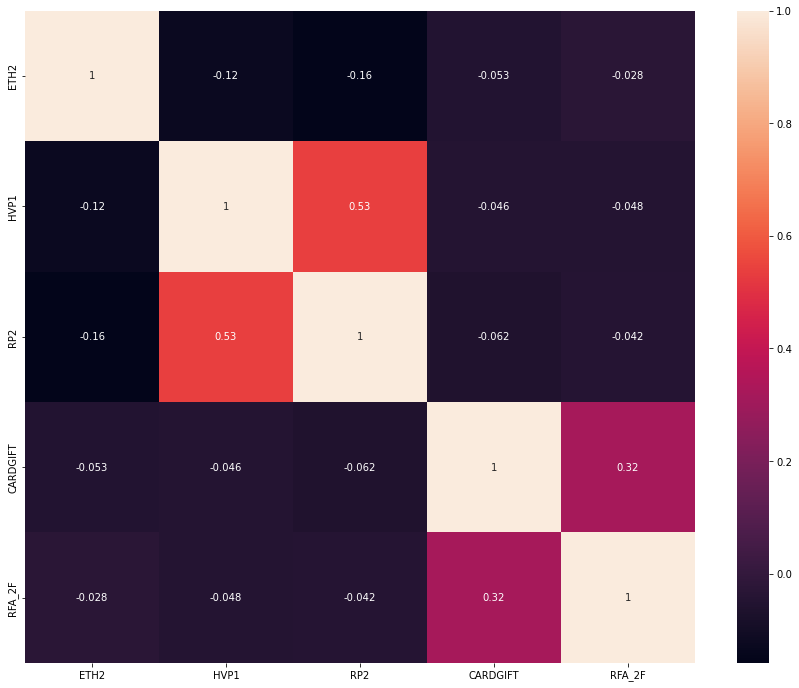

In [229]:
corr_matrix=numericals_transf[new_num].corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# I will keep this 5 columns only for the numericals

In [235]:
num = numerical[['RFA_2F','CARDGIFT','RP2','HVP1','ETH2']]

In [236]:
data_to_use1 = pd.concat([cat1,num,targets['TARGET_B']],axis=1)
data_to_use2 = pd.concat([cat2,num,targets['TARGET_B']],axis=1)

### 1. Apply the Random Forests algorithm but this time only by upscaling the data.

#### Upscaling

In [237]:
data_to_use1['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [238]:
from sklearn.utils import resample

category_0 = data_to_use1[data_to_use1['TARGET_B'] == 0]
category_1 = data_to_use1[data_to_use1['TARGET_B'] == 1]

In [239]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [240]:
print(category_0.shape)
print(category_1_oversampled.shape)

(90569, 13)
(90569, 13)


In [241]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)
data_upsampled['TARGET_B'].value_counts()

0    90569
1    90569
Name: TARGET_B, dtype: int64

#### Cleaning, scaling and encoding data

In [243]:
X_u = data_upsampled.drop(['TARGET_B'],axis=1)
y_u = data_upsampled[['TARGET_B']]

In [245]:
X_u[cat1.columns].nunique()

STATE           12
HOMEOWNR         2
GENDER           3
DOMAIN_B         4
ODATEW_YR       15
LASTDATE_YR      3
FIRSTDATE_YR    26
dtype: int64

In [248]:
X_u[num.columns]

,RFA_2F,CARDGIFT,RP2,HVP1,ETH2
0,4,14,5,2,1
1,2,1,91,97,0
2,4,14,2,0,2
3,4,7,8,10,0
4,2,8,58,0,98
...,...,...,...,...,...
40186,3,3,4,0,0
80794,1,6,6,2,1
58132,4,3,0,1,22
93220,2,3,8,0,5


In [259]:
def ready_dfs(X,y):
    # * Split the data into a training set and a test set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    #split numericals - categoricals
    X_train_num = X_train[num.columns]
    X_test_num = X_test[num.columns]
    
    X_train_cat = X_train[cat1.columns]
    X_test_cat = X_test[cat1.columns]
    
    # * Scale the features either by using normalizer or a standard scaler.
        
    #fit and transform scaling numericals
    minmax = MinMaxScaler().fit(X_train_num) 
    
    X_train_norm = minmax.transform(X_train_num)
    X_test_norm = minmax.transform(X_test_num)
    
    # convert to dataframe again
    X_train_norm = pd.DataFrame(X_train_norm,columns=X_train_num.columns) 
    X_test_norm = pd.DataFrame(X_test_norm,columns=X_test_num.columns) 
    
    # * Encode the categorical features using One-Hot Encoding or Ordinal Encoding
    
    X_train_cat = X_train_cat.astype(str)
    X_test_cat = X_test_cat.astype(str)
    
    
    #fit and transform encoding categoricals
    onehot = OneHotEncoder(handle_unknown='ignore', drop='first').fit(X_train_cat) 
    
    cols = onehot.get_feature_names_out(input_features=X_train_cat.columns)
    
    X_train_enc = onehot.transform(X_train_cat).toarray()
    X_test_enc = onehot.transform(X_test_cat).toarray()
    
    # convert to dataframe again
    X_train_enc = pd.DataFrame(X_train_enc, columns=cols)
    X_test_enc = pd.DataFrame(X_test_enc, columns=cols)
    
    #ready to fit the model
    X_train_ready = pd.concat([X_train_norm,X_train_enc],axis=1)
    X_test_ready = pd.concat([X_test_norm,X_test_enc],axis=1)
    
    return X_train_ready, X_test_ready, y_train, y_test

In [260]:
X_train_ready, X_test_ready, y_train, y_test = ready_dfs(X_u,y_u)

(135853, 12)
(45285, 12)
(135853, 1)
(45285, 1)


In [263]:
X_test_ready.isna().sum().sum()

0

### 2. Use Feature Selections that you have learned in class to decide if you want to use all of the features

In [63]:
X_train_ready.shape

(135853, 354)

In [64]:
y_train.shape

(135853, 1)

##### check K best features

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# To check the scores
model = SelectKBest(chi2, k=10).fit(X_train_ready, y_train)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = X_train_ready.columns
print(df.sort_values(by = ['score'], ascending = False).head(40))

           score       Column
323  1350.233899       RFA_2F
341   819.664393     RFA_2A_G
339   563.829568     RFA_2A_E
340   362.378142     RFA_2A_F
7     340.441243  LASTDATE_YR
120   190.408241         HVP1
121   186.608835         HVP2
315   183.805211     CARDGIFT
122   159.436706         HVP3
125   136.399403         HVP6
123   110.799413         HVP4
352   107.319608   DOMAIN_B_3
32    102.730989         ETH2
139    97.335248          RP1
140    88.341201          RP2
336    84.945710   HOMEOWNR_U
1      69.235324    ODATEW_YR
93     62.623282          HV1
94     62.120000          HV2
314    58.347903     NGIFTALL
117    57.936899        ETHC4
118    57.921197        ETHC5
8      56.516310  LASTDATE_MM
326    48.808509     STATE_GA
141    47.336119          RP3
309    45.970188     CARDPROM
310    43.850674      NUMPROM
124    41.145358         HVP5
324    40.446736     CLUSTER2
328    38.277823     STATE_IN
2      36.473959    ODATEW_MM
346    36.056158   DOMAIN_A_S
353    32.

In [ ]:
# getting only the columns with score > 100

In [90]:
df[df.sort_values(by = ['score'], ascending = False)['score']>100]

,score,Column
7,340.441243,LASTDATE_YR
32,102.730989,ETH2
120,190.408241,HVP1
121,186.608835,HVP2
122,159.436706,HVP3
123,110.799413,HVP4
125,136.399403,HVP6
315,183.805211,CARDGIFT
323,1350.233899,RFA_2F
339,563.829568,RFA_2A_E


In [91]:
cols100 = list(df[df.sort_values(by = ['score'], ascending = False)['score']>100]['Column'])

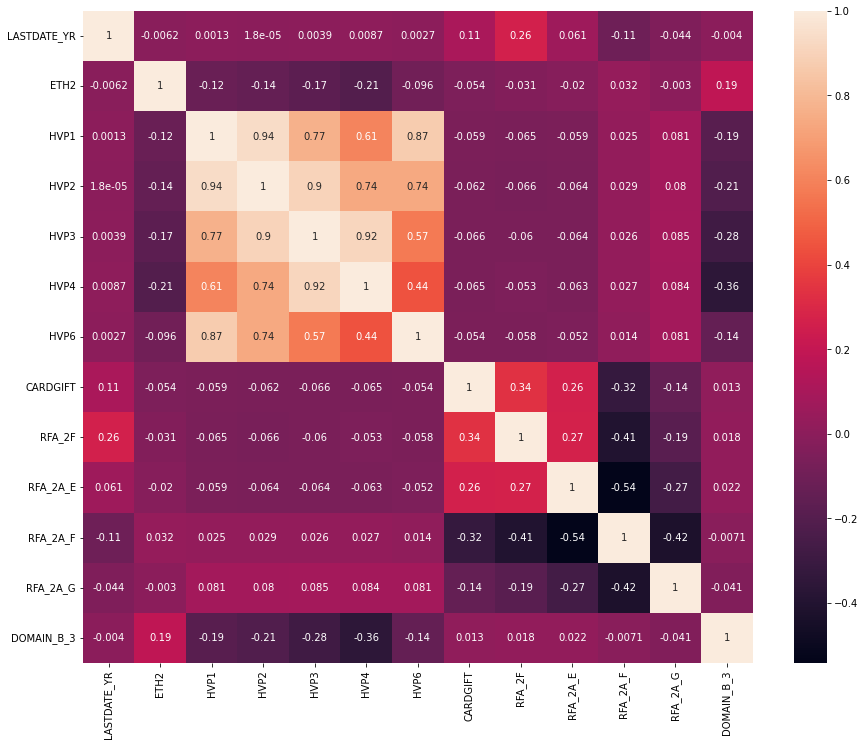

In [92]:
corr_matrix=X_train_ready[cols100].corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [111]:
to_drop = ['HVP6','HVP4','HVP3','HVP2']
news100 = []

for i in cols100:
    if i not in to_drop:
        news100.append(i)

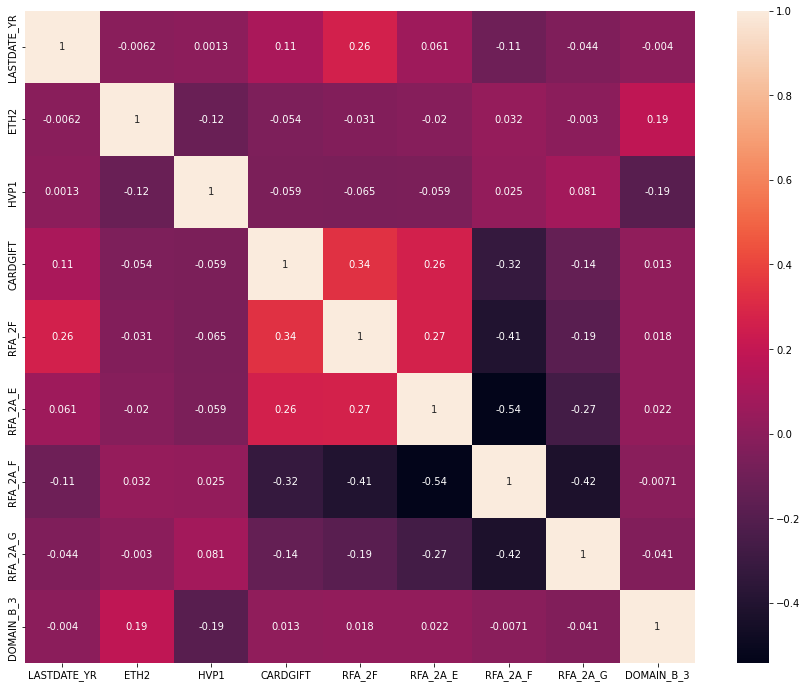

In [112]:
corr_matrix=X_train_ready[news100].corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [117]:
X_train_ready100 = X_train_ready[news100]
X_test_ready100 = X_test_ready[news100]

In [ ]:
# getting 40 first columns, to keep more than 10 after dropping because of multicolinearity

In [66]:
cols = list(df.sort_values(by = ['score'], ascending = False).head(40)['Column'].values)

In [67]:
cols

['RFA_2F',
 'RFA_2A_G',
 'RFA_2A_E',
 'RFA_2A_F',
 'LASTDATE_YR',
 'HVP1',
 'HVP2',
 'CARDGIFT',
 'HVP3',
 'HVP6',
 'HVP4',
 'DOMAIN_B_3',
 'ETH2',
 'RP1',
 'RP2',
 'HOMEOWNR_U',
 'ODATEW_YR',
 'HV1',
 'HV2',
 'NGIFTALL',
 'ETHC4',
 'ETHC5',
 'LASTDATE_MM',
 'STATE_GA',
 'RP3',
 'CARDPROM',
 'NUMPROM',
 'HVP5',
 'CLUSTER2',
 'STATE_IN',
 'ODATEW_MM',
 'DOMAIN_A_S',
 'DOMAIN_B_4',
 'DOMAIN_A_R',
 'INCOME',
 'HV4',
 'HV3',
 'STATE_IL',
 'DATASRCE_2',
 'MSA']

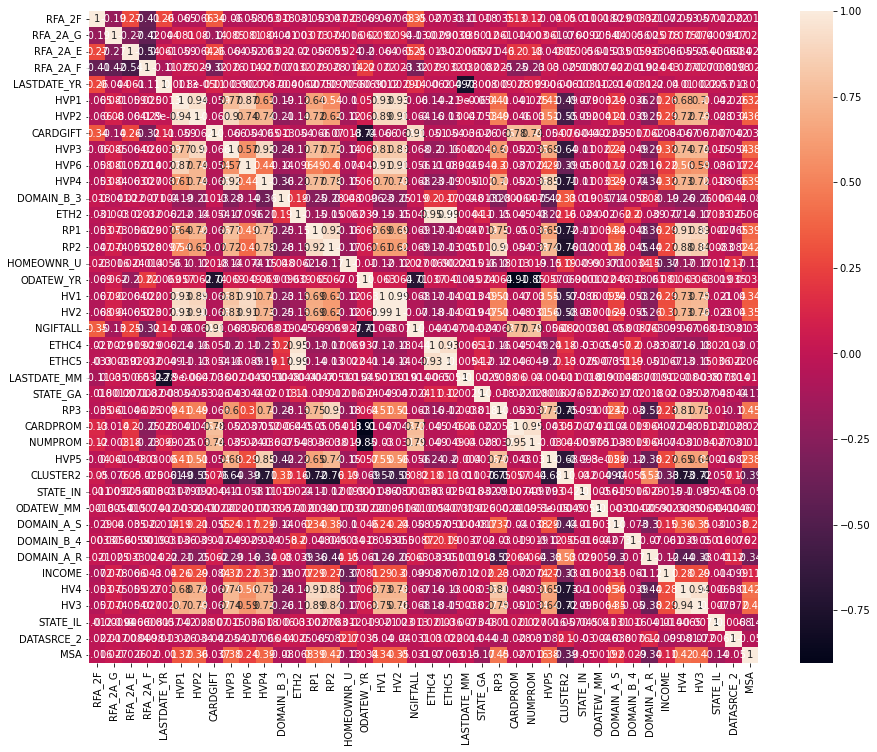

In [68]:
corr_matrix=X_train_ready[cols].corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# build a function to drop the columns that have 0.7 or higher absolut value in correlation

In [69]:
drop_cols = ['RP3','HVP5','NUMPROM','HV1','HV2','ETHC4','HVC1','ETHC5','RP2','NGIFTALL','HVP4','HVP6','HVP3','HVP2','CARDPROM','HV3','CLUSTER2','RP1','LASTDATE_MM','ODATEW_YR']

In [70]:
news = []

for i in cols:
    if i not in drop_cols:
        news.append(i)

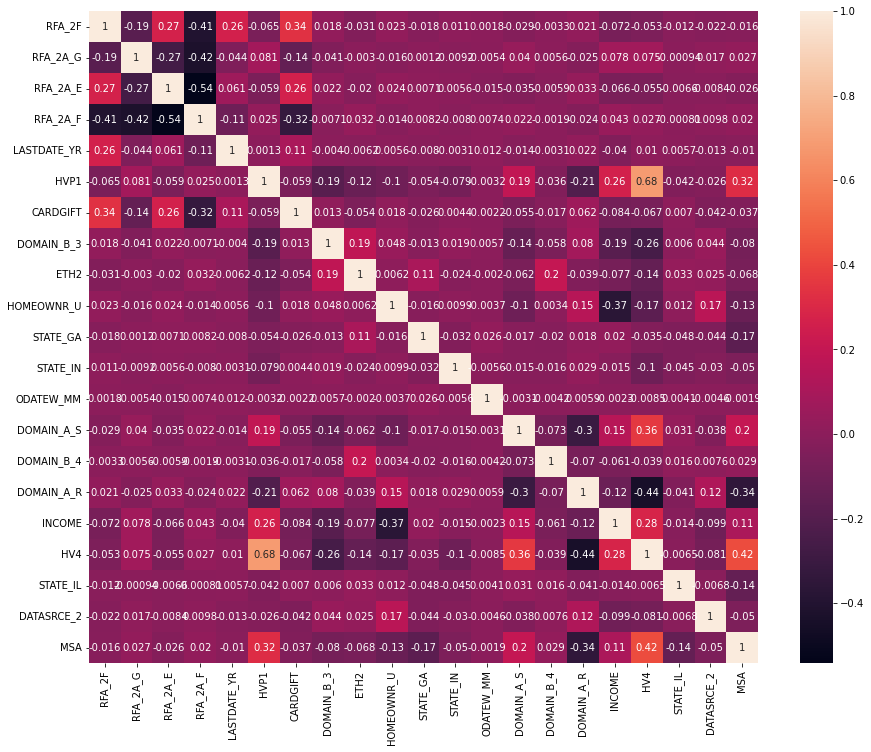

In [71]:
corr_matrix=X_train_ready[news].corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [122]:
X_train_ready21 = X_train_ready[news]
X_test_ready21 = X_test_ready[news]

##### PCA ¿?

In [94]:
from sklearn.decomposition import PCA

In [95]:
my_pca = PCA(0.9)
my_pca.fit(X_train_ready)

PCA(n_components=0.9)

In [97]:
my_pca.explained_variance_ratio_

array([0.15246901, 0.07991868, 0.04918373, 0.0448335 , 0.03834655,
       0.03605732, 0.02981632, 0.02893307, 0.02516318, 0.02465804,
       0.0237865 , 0.0224541 , 0.02235372, 0.01968299, 0.01921676,
       0.01832023, 0.01682562, 0.01612071, 0.01571643, 0.01434267,
       0.01273896, 0.01251623, 0.01157687, 0.01124226, 0.01089098,
       0.01012002, 0.00980942, 0.00867573, 0.00808872, 0.00806196,
       0.00782679, 0.006575  , 0.0064459 , 0.00618206, 0.00605969,
       0.00557787, 0.00538293, 0.00535751, 0.00509522, 0.00462451,
       0.00450968, 0.00412247, 0.00403721, 0.00385135, 0.00378696,
       0.00373572, 0.00360848, 0.00337856, 0.00321734, 0.00309545,
       0.00297219])

In [99]:
exp_var_pca = my_pca.explained_variance_ratio_

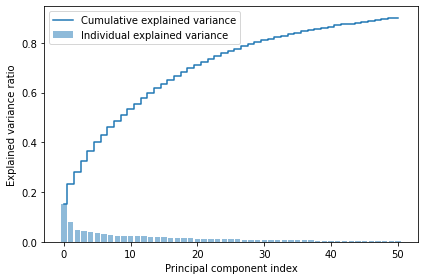

In [100]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [106]:
X_train_pca = my_pca.transform(X_train_ready)
X_test_pca = my_pca.transform(X_test_ready)

##### RFE

In [ ]:
# X = numerical_scaled
# y = targets['TARGET_D']

from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)  # n_features_to_select=20 number of features we want to end up with
rfe.fit(X, y)                                          #  verbose=True it gives information of each feature

In [128]:
from sklearn.feature_selection import RFE

In [129]:
forest = RandomForestClassifier()

In [130]:
rfe = RFE(forest, n_features_to_select=20, verbose=True)  # n_features_to_select=20 number of features we want to end up with
rfe.fit(X_train_ready, y_train)  

Fitting estimator with 354 features.
Fitting estimator with 353 features.
Fitting estimator with 352 features.
Fitting estimator with 351 features.
Fitting estimator with 350 features.
Fitting estimator with 349 features.
Fitting estimator with 348 features.
Fitting estimator with 347 features.
Fitting estimator with 346 features.
Fitting estimator with 345 features.
Fitting estimator with 344 features.
Fitting estimator with 343 features.
Fitting estimator with 342 features.
Fitting estimator with 341 features.
Fitting estimator with 340 features.
Fitting estimator with 339 features.
Fitting estimator with 338 features.
Fitting estimator with 337 features.
Fitting estimator with 336 features.
Fitting estimator with 335 features.
Fitting estimator with 334 features.
Fitting estimator with 333 features.
Fitting estimator with 332 features.
Fitting estimator with 331 features.
Fitting estimator with 330 features.
Fitting estimator with 329 features.
Fitting estimator with 328 features.
F

Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
F

RFE(estimator=RandomForestClassifier(), n_features_to_select=20, verbose=True)

In [131]:
rfe.ranking_

array([ 42, 169, 335, 110,  71, 198, 102, 240,  83, 159,  89,   1, 148,
       233, 137, 254,  12,   1,   1,  55,  99, 124, 217,   1,   1,   1,
       295, 270, 269, 230, 206,  70, 176, 271, 231, 162, 301, 299, 284,
       288, 302, 304, 334, 215, 300, 307, 253, 190, 210, 216, 229, 243,
       237, 204,  27,  98,  73, 163, 130, 140, 181, 167, 209, 203, 141,
       153, 128, 143, 112, 123, 197,  85, 142,  81, 164, 152, 191, 241,
        77, 196, 227,  96,   1,   8, 104,  34, 218, 156, 195, 202, 238,
       252, 286,   1,   1, 268, 260,  82,  14, 131,  84,  93,  88, 118,
        50, 179, 150, 187, 170, 276, 211, 161, 132, 225, 133,  17, 158,
       264, 219, 285, 207, 154,  91,  74, 157, 255, 221,   2, 122, 145,
       278, 289, 111, 220, 200,  57, 177, 223, 258,  94,  29,   9,  58,
        60,  30,  16,   1,   1,  20,  11,   1, 108, 101,  65,  66, 119,
       192, 250, 273, 266,  97,  78,  45,  39,  52, 172, 234, 257, 249,
        62, 166,  10, 129,   1,  43,  47,  18,  56, 232, 245, 29

In [132]:
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(X_train_ready).columns

In [133]:
df.sort_values(['Rank']).head(30)

,Rank,Column_name
82,1,HHP1
197,1,LFC7
173,1,MC1
150,1,IC5
25,1,POP903
24,1,POP902
23,1,POP901
276,1,POBC2
147,1,IC2
18,1,WWIIVETS


##### Hyperparameter search

In [72]:
# from sklearn.model_selection import RandomizedSearchCV

In [79]:
# max_depth_choices= [3,4,5,None]
# min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
# min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
# max_samples = [0.2,0.5,0.8]



# random_grid = {'max_depth': max_depth_choices,
#                'min_samples_split': min_samples_split_choices,
#                'min_samples_leaf': min_samples_leaf_choices,
#               'max_samples' : max_samples}


# model = RandomForestClassifier()
# random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 5, n_jobs = -1)

In [81]:
# random_search.fit(X_train_ready,y_train)

In [ ]:
# random_search.best_params_

In [ ]:
# random_search.best_score_

### 3. Apply the Random Forests

In [120]:
def try_dfs(X_tr,X_te,y_tr,y_te):
    
    clf = RandomForestClassifier(max_depth=5, # max number of questions
                                 min_samples_split=21, # amount of rows still considered at every question
                                 min_samples_leaf =21,  # ultimate answer based on at least this many rows
                                 max_samples=0.8)  # fraction of X-train to use in each tree

    clf.fit(X_tr, y_tr)
    print(clf.score(X_tr, y_tr))
    print(clf.score(X_te, y_te))

    y_pred = clf.predict(X_te)
    display(y_te.value_counts())
    display(confusion_matrix(y_te, y_pred))
    return

In [127]:
try_dfs(X_train_ready,X_test_ready, y_train,y_test) # with all the data

0.6147674324453637
0.6083250524456222


TARGET_B
1           22658
0           22627
dtype: int64

array([[13461,  9166],
       [ 8571, 14087]], dtype=int64)

In [124]:
try_dfs(X_train_pca,X_test_pca, y_train,y_test) # with PCA after Xy split

0.6184405202682312
0.6127415258915756


TARGET_B
1           22658
0           22627
dtype: int64

array([[13982,  8645],
       [ 8892, 13766]], dtype=int64)

In [125]:
try_dfs(X_train_ready100,X_test_ready100, y_train,y_test) # with K best 9

0.5961958882026897
0.5935298664016783


TARGET_B
1           22658
0           22627
dtype: int64

array([[13866,  8761],
       [ 9646, 13012]], dtype=int64)

In [126]:
try_dfs(X_train_ready21,X_test_ready21, y_train,y_test) # with K best 21

0.5987059542299397
0.594876890802694


TARGET_B
1           22658
0           22627
dtype: int64

array([[13721,  8906],
       [ 9440, 13218]], dtype=int64)

In [264]:
try_dfs(X_train_ready,X_test_ready, y_train,y_test) # with the data selected before xy split

0.5945249644836699
0.5907916528651872


TARGET_B
0           22756
1           22529
dtype: int64

array([[13187,  9569],
       [ 8962, 13567]], dtype=int64)